In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from joblib import dump

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('Данные для задачи.txt', sep=';')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
df.head(10)

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,Land Rover,Discovery,245.0,0,1283202.0,856,F,0,0,N,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,Opel,Zafira,140.0,0,453000.0,N,M,0,0,0,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,Kia,Soul,129.0,0,647718.0,N,F,0,0,1L,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,Citroen,C-Crosser,170.0,0,757795.0,N,M,0,0,0,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,Renault,Logan,102.0,0,604500.0,171,F,0,0,N,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17
5,TRAIN,6,2,1,1,2,4,Санкт-Петербург,60,40,Suzuki,Grand Vitara,140.0,0,535815.0,174,M,0,0,0,0,0,0,0,0.0,0,3,7500.0,Санкт-Петербург,-0.02
6,TRAIN,7,1,1,1,52,6,Москва,41,6,Kia,Sorento,175.0,0,1696400.0,1372,F,0,0,N,N,0,0,0,0.0,0,0,0.0,Москва,-0.23
7,TRAIN,8,2,2,1,10,1,Санкт-Петербург,48,19,Hyundai,Santa Fe,197.0,0,1063317.0,1373,M,0,0,0,0,1,1,0,0.0,0,3,0.0,Санкт-Петербург,0.04
8,TRAIN,9,1,1,0,53,6,Москва,27,7,BMW,X3,245.0,0,2248000.0,849,F,1S,1S,N,N,0,0,0,4.0,0,0,0.0,Москва,-1.00
9,TEST,10,2,2,0,53,6,Санкт-Петербург,56,37,Skoda,Octavia,102.0,0,480930.0,224,M,0,0,0,0,0,1,0,0.0,0,1,15000.0,Санкт-Петербург,-0.04


In [5]:
train = df.loc[df['DATA_TYPE'] == 'TRAIN']
test = df.loc[df['DATA_TYPE'] == 'TEST ']

In [6]:
train.shape

(77407, 30)

In [7]:
X = train.drop(columns=['POLICY_IS_RENEWED', 'DATA_TYPE'])
y = train['POLICY_IS_RENEWED']

In [8]:
X_ohe_encoded = pd.get_dummies(X)

In [9]:
X_ohe_encoded

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE,POLICY_BRANCH_Москва,POLICY_BRANCH_Санкт-Петербург,VEHICLE_MAKE_<Пусто>,VEHICLE_MAKE_Acura,VEHICLE_MAKE_Alfa Romeo,VEHICLE_MAKE_Audi,VEHICLE_MAKE_BMW,VEHICLE_MAKE_BYD,...,CLIENT_REGISTRATION_REGION_Саха /Якутия/,CLIENT_REGISTRATION_REGION_Сахалинская,CLIENT_REGISTRATION_REGION_Свердловская,CLIENT_REGISTRATION_REGION_Севастополь,CLIENT_REGISTRATION_REGION_Северная Осетия - Алания,CLIENT_REGISTRATION_REGION_Смоленская,CLIENT_REGISTRATION_REGION_Ставропольский,CLIENT_REGISTRATION_REGION_Тамбовская,CLIENT_REGISTRATION_REGION_Татарстан,CLIENT_REGISTRATION_REGION_Тверская,CLIENT_REGISTRATION_REGION_Томская,CLIENT_REGISTRATION_REGION_Тульская,CLIENT_REGISTRATION_REGION_Тыва,CLIENT_REGISTRATION_REGION_Тюменская,CLIENT_REGISTRATION_REGION_Удмуртская,CLIENT_REGISTRATION_REGION_Ульяновская,CLIENT_REGISTRATION_REGION_Хабаровский,CLIENT_REGISTRATION_REGION_Хакасия,CLIENT_REGISTRATION_REGION_Ханты-Мансийский Автономный округ - Югра,CLIENT_REGISTRATION_REGION_Челябинская,CLIENT_REGISTRATION_REGION_Чеченская,CLIENT_REGISTRATION_REGION_Чувашская Республика -,CLIENT_REGISTRATION_REGION_Чукотский,CLIENT_REGISTRATION_REGION_Ямало-Ненецкий,CLIENT_REGISTRATION_REGION_Ярославская
0,1,1,1,39,1,51,12,245.0,0,1283202.0,1,0,0,0.0,0,0.0,-1.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,50,5,35,7,140.0,0,453000.0,1,1,0,0.0,0,0.0,-0.05,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,52,6,41,6,129.0,0,647718.0,0,0,0,0.0,0,12518.0,-0.07,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,50,5,36,12,170.0,0,757795.0,1,1,0,0.0,0,15000.0,0.05,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,52,6,42,5,102.0,0,604500.0,0,0,0,0.0,0,50000.0,0.17,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96600,96601,3,3,55,6,38,6,199.0,0,1799000.0,1,1,0,0.0,0,0.0,-0.14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96601,96602,4,3,50,5,30,6,249.0,0,3000500.0,1,1,0,0.0,0,0.0,0.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96602,96603,3,3,50,5,59,31,140.0,0,561700.0,1,1,0,3.0,0,0.0,-0.22,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96603,96604,3,3,52,6,41,19,173.0,0,1783992.0,0,1,0,0.0,0,0.0,0.04,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# save columns to use at the inference stage
train_cols = list(X_ohe_encoded.columns)

with open('train_cols.pkl', 'wb') as f:
    pickle.dump(train_cols, f)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe_encoded, y, test_size=0.1, random_state=42)

In [12]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6920294535589717


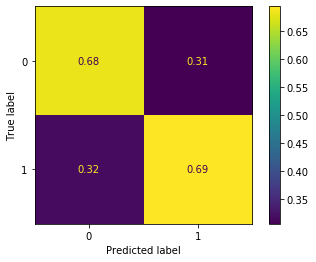

In [15]:
plot_confusion_matrix(clf, X_test, y_test, normalize='pred')
plt.show()

In [16]:
# save the model
dump(clf, 'rf_classifier1.joblib', compress=3)

['rf_classifier1.joblib']